# Sonar Dataset

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('sonar.all-data.csv')
ds

,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
ds=pd.read_csv('sonar.all-data.csv', names=range(0,61), header=0)
ds

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [4]:
df=pd.DataFrame(ds)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
1,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
2,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
3,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
4,0.0286,0.0453,0.0277,0.0174,0.0384,0.0990,0.1201,0.1833,0.2105,0.3039,...,0.0045,0.0014,0.0038,0.0013,0.0089,0.0057,0.0027,0.0051,0.0062,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
202,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
203,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
204,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
205,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [5]:
df.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
       ...   
56    float64
57    float64
58    float64
59    float64
60     object
Length: 61, dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       207 non-null    float64
 1   1       207 non-null    float64
 2   2       207 non-null    float64
 3   3       207 non-null    float64
 4   4       207 non-null    float64
 5   5       207 non-null    float64
 6   6       207 non-null    float64
 7   7       207 non-null    float64
 8   8       207 non-null    float64
 9   9       207 non-null    float64
 10  10      207 non-null    float64
 11  11      207 non-null    float64
 12  12      207 non-null    float64
 13  13      207 non-null    float64
 14  14      207 non-null    float64
 15  15      207 non-null    float64
 16  16      207 non-null    float64
 17  17      207 non-null    float64
 18  18      207 non-null    float64
 19  19      207 non-null    float64
 20  20      207 non-null    float64
 21  21      207 non-null    float64
 22  22

In [7]:
df.columns

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
            34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
            51, 52, 53, 54, 55, 56, 57, 58, 59, 60],
           dtype='int64')

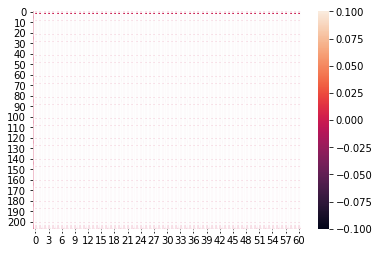

In [8]:
#Lets check whether the null values are present in the dataset or not using heatmap

sns.heatmap(df.isnull(), annot=True)
plt.show()

In [9]:
#lets check the null values without using visualization

df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

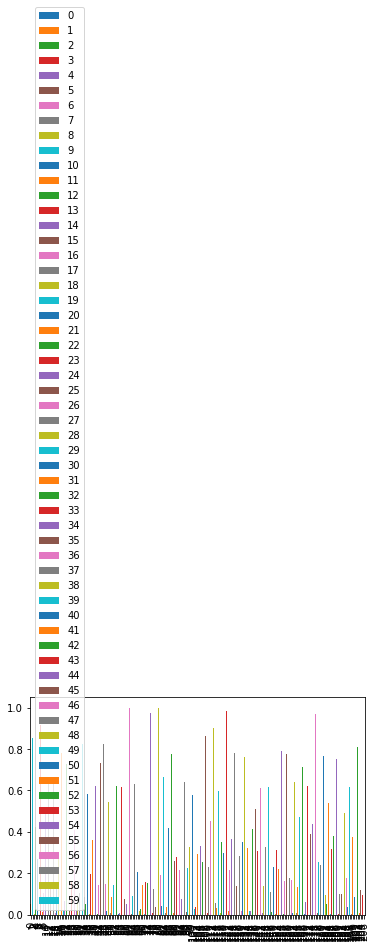

In [10]:
df.plot.bar()

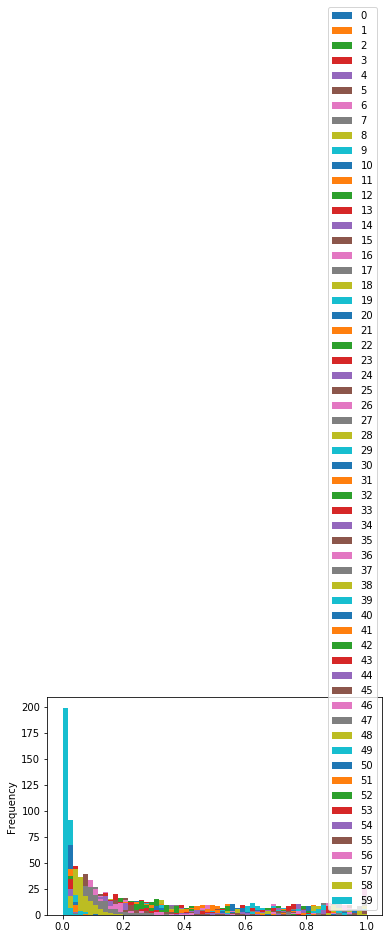

In [11]:
df.plot.hist(bins=60)

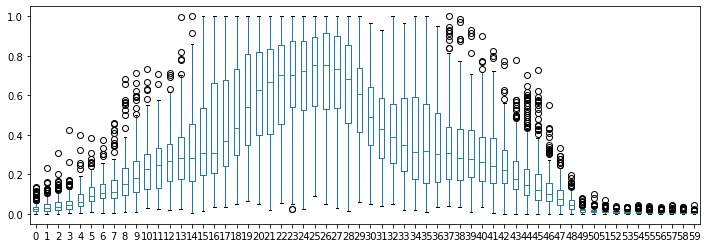

In [54]:
df.plot.box(figsize=(12,4))

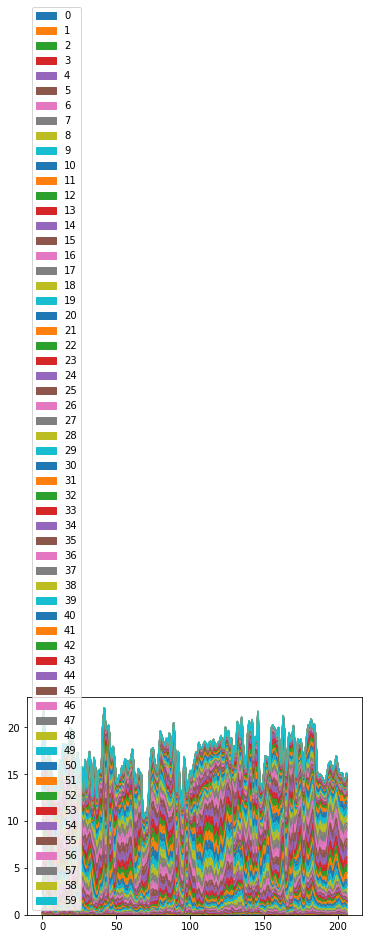

In [13]:
df.plot.area()

In [14]:
#Now lets check the Correlation factor

dfcor=df.corr()
dfcor

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,1.000000,0.736104,0.571706,0.490853,0.345744,0.238824,0.262095,0.356312,0.356822,0.318440,...,0.255916,0.354348,0.310964,0.324101,0.311683,0.224784,0.319663,0.368413,0.357611,0.346302
1,0.736104,1.000000,0.779915,0.607297,0.419877,0.332319,0.279328,0.334747,0.317929,0.270787,...,0.320931,0.435641,0.346259,0.384526,0.380188,0.263959,0.282822,0.353061,0.352260,0.359010
2,0.571706,0.779915,1.000000,0.782662,0.546365,0.346271,0.190628,0.237974,0.253615,0.219641,...,0.238392,0.395121,0.333124,0.367687,0.289754,0.289393,0.383945,0.334122,0.425100,0.374256
3,0.490853,0.607297,0.782662,1.000000,0.729338,0.352901,0.248713,0.248131,0.252048,0.238136,...,0.177103,0.372377,0.363470,0.337358,0.284345,0.287941,0.349411,0.345537,0.421410,0.399262
4,0.345744,0.419877,0.546365,0.729338,1.000000,0.597438,0.334831,0.203590,0.176522,0.183240,...,0.115023,0.269478,0.316412,0.204402,0.197098,0.197829,0.218004,0.238749,0.290793,0.255220
5,0.238824,0.332319,0.346271,0.352901,0.597438,1.000000,0.703624,0.471942,0.329145,0.288639,...,0.172210,0.252509,0.162255,0.164595,0.133351,0.168382,0.163433,0.204027,0.220678,0.178027
6,0.262095,0.279328,0.190628,0.248713,0.334831,0.703624,1.000000,0.675612,0.469490,0.425675,...,0.182929,0.147402,0.047982,0.161645,0.196456,0.171433,0.183382,0.242632,0.183279,0.224536
7,0.356312,0.334747,0.237974,0.248131,0.203590,0.471942,0.675612,1.000000,0.779512,0.652635,...,0.260114,0.221356,0.103418,0.233340,0.240079,0.276214,0.266743,0.287568,0.194209,0.147350
8,0.356822,0.317929,0.253615,0.252048,0.176522,0.329145,0.469490,0.779512,1.000000,0.879711,...,0.172312,0.215365,0.109029,0.199749,0.181543,0.226605,0.186347,0.232078,0.096662,0.099233
9,0.318440,0.270787,0.219641,0.238136,0.183240,0.288639,0.425675,0.652635,0.879711,1.000000,...,0.167179,0.166151,0.097689,0.146820,0.175322,0.152548,0.141211,0.212272,0.058260,0.097528


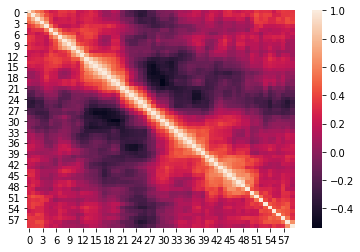

In [15]:
#Now lets check the Correlation factor with visualization

sns.heatmap(dfcor)

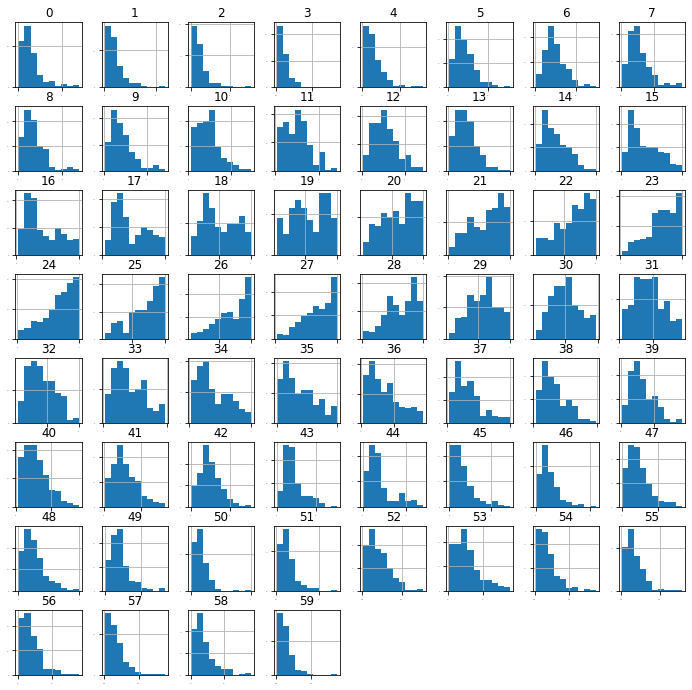

In [52]:
# histogram plot

df.hist(sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
plt.show()

In [27]:
# Now seperating the input column & out columns for further calculation

df1= df.iloc[:,0:-1].values
df2= df.iloc[:, -1].values

df1=pd.DataFrame(df1)
df2=pd.DataFrame(df2)

#Assigning the x & y cordinate value for train, test, spli function
x=df1
y=df2

print(x)
print(x.shape)
print()
print(y)
print(y.shape)

         0       1       2       3       4       5       6       7       8   \
0    0.0453  0.0523  0.0843  0.0689  0.1183  0.2583  0.2156  0.3481  0.3337   
1    0.0262  0.0582  0.1099  0.1083  0.0974  0.2280  0.2431  0.3771  0.5598   
2    0.0100  0.0171  0.0623  0.0205  0.0205  0.0368  0.1098  0.1276  0.0598   
3    0.0762  0.0666  0.0481  0.0394  0.0590  0.0649  0.1209  0.2467  0.3564   
4    0.0286  0.0453  0.0277  0.0174  0.0384  0.0990  0.1201  0.1833  0.2105   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
202  0.0187  0.0346  0.0168  0.0177  0.0393  0.1630  0.2028  0.1694  0.2328   
203  0.0323  0.0101  0.0298  0.0564  0.0760  0.0958  0.0990  0.1018  0.1030   
204  0.0522  0.0437  0.0180  0.0292  0.0351  0.1171  0.1257  0.1178  0.1258   
205  0.0303  0.0353  0.0490  0.0608  0.0167  0.1354  0.1465  0.1123  0.1945   
206  0.0260  0.0363  0.0136  0.0272  0.0214  0.0338  0.0655  0.1400  0.1843   

         9   ...      50      51      52      53   

In [29]:
# Import label encoder 
# Now lets replace the categorical values (alphabetic values) to numeric values using Label Encoder
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'Embarked'. 
y=label_encoder.fit_transform(y)
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.22, random_state=42)

In [39]:
#Logistic Regression

lr=LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train, y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test, predlr))
print(confusion_matrix(y_test, predlr))
print(classification_report(y_test, predlr))

0.7391304347826086
[[19  9]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.86      0.68      0.76        28
           1       0.62      0.83      0.71        18

    accuracy                           0.74        46
   macro avg       0.74      0.76      0.74        46
weighted avg       0.77      0.74      0.74        46



In [40]:
#Random forest classifier

rfc=RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc.score(x_train, y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test, predrfc))
print(confusion_matrix(y_test, predrfc))
print(classification_report(y_test, predrfc))

0.8043478260869565
[[23  5]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84        28
           1       0.74      0.78      0.76        18

    accuracy                           0.80        46
   macro avg       0.79      0.80      0.80        46
weighted avg       0.81      0.80      0.81        46



In [57]:
#GaussianNB

gnb=GaussianNB()
gnb.fit(x_train, y_train)
gnb.score(x_train, y_train)
predgnb=gnb.predict(x_test)
print(accuracy_score(y_test, predgnb))
print(confusion_matrix(y_test, predgnb))
print(classification_report(y_test, predgnb))

0.6304347826086957
[[16 12]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.76      0.57      0.65        28
           1       0.52      0.72      0.60        18

    accuracy                           0.63        46
   macro avg       0.64      0.65      0.63        46
weighted avg       0.67      0.63      0.63        46



In [58]:
#support vector classifier

svc=SVC()
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test, predsvc))

0.7608695652173914
[[21  7]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.67      0.78      0.72        18

    accuracy                           0.76        46
   macro avg       0.75      0.76      0.76        46
weighted avg       0.77      0.76      0.76        46



In [59]:
#GradientBoostingClassifier

from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train, y_train)
predgb=gb.predict(x_test)
print(accuracy_score(y_test, predgb))
print(confusion_matrix(y_test, predgb))
print(classification_report(y_test, predgb))

0.8043478260869565
[[22  6]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.71      0.83      0.77        18

    accuracy                           0.80        46
   macro avg       0.80      0.81      0.80        46
weighted avg       0.82      0.80      0.81        46



In [55]:
#AdaBoost Classifier

ad=AdaBoostClassifier()
ad.fit(x_train, y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test, ad_pred))
print(confusion_matrix(y_test, ad_pred))
print(classification_report(y_test, ad_pred))

0.782608695652174
[[21  7]
 [ 3 15]]
              precision    recall  f1-score   support

           0       0.88      0.75      0.81        28
           1       0.68      0.83      0.75        18

    accuracy                           0.78        46
   macro avg       0.78      0.79      0.78        46
weighted avg       0.80      0.78      0.79        46



In [44]:
#KNeighborsClassifie

knn=KNeighborsClassifier()
knn.fit(x_train, y_train)
knn.score(x_train, y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test, predknn))

0.7608695652173914
[[21  7]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        28
           1       0.67      0.78      0.72        18

    accuracy                           0.76        46
   macro avg       0.75      0.76      0.76        46
weighted avg       0.77      0.76      0.76        46



In [56]:
#Decision Tree Classifier

dtc=DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc.score(x_train, y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test, preddtc))
print(confusion_matrix(y_test, preddtc))
print(classification_report(y_test, preddtc))

0.6521739130434783
[[17 11]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.77      0.61      0.68        28
           1       0.54      0.72      0.62        18

    accuracy                           0.65        46
   macro avg       0.66      0.66      0.65        46
weighted avg       0.68      0.65      0.66        46



In [64]:
def decisiontree(cr):
    dtc=DecisionTreeClassifier(criterion=cr)
    dtc.fit(x_train, y_train)
    
    preddt=dtc.predict(x_test)
    print(accuracy_score(y_test, preddt))
    print(confusion_matrix(y_test, preddt))
    print(classification_report(y_test, preddt))
    
print(decisiontree('gini'))
print()
print(decisiontree('entropy'))

0.6739130434782609
[[17 11]
 [ 4 14]]
              precision    recall  f1-score   support

           0       0.81      0.61      0.69        28
           1       0.56      0.78      0.65        18

    accuracy                           0.67        46
   macro avg       0.68      0.69      0.67        46
weighted avg       0.71      0.67      0.68        46

None

0.717391304347826
[[20  8]
 [ 5 13]]
              precision    recall  f1-score   support

           0       0.80      0.71      0.75        28
           1       0.62      0.72      0.67        18

    accuracy                           0.72        46
   macro avg       0.71      0.72      0.71        46
weighted avg       0.73      0.72      0.72        46

None


In [65]:
#Final model is selected as "RandomForestClassifier", so cross validating the model using cross_val_score

from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, x_train, y_train, cv=5, scoring = "accuracy")

print("Scores:", scores)
print()
print("Mean:", scores.mean())

Scores: [0.93939394 0.90625    0.78125    0.84375    0.59375   ]

Mean: 0.8128787878787879


In [66]:
#Lets save the model using joblib
from sklearn.externals import joblib

#save the model as a pickle in a file
joblib.dump(predrfc, 'predrfc_Sonar.all_Project3.pkl')

['predrfc_Sonar.all_Project3.pkl']